In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!tar -xf "/content/drive/MyDrive/Assignment_ML/SuperResolution.tar.xz" -C "/content/"

### Image Data:
- Count of Images: Ensuring the number of images in the HR and LR folders match.
- Image Dimensions: Comparing the image dimensions between the HR and LR images. This helps visualize the resolution difference.
- Image Formats: Checking if the images are all in the same format (JPEG, PNG, etc.).

In [4]:
import os
from PIL import Image

def get_image_info(folder_path):
    image_info = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('jpg', 'jpeg', 'png')):
            img = Image.open(os.path.join(folder_path, filename))
            image_info.append((filename, img.size, img.format))
    return image_info

# Paths to HR and LR folders
hr_folder = "/content/SuperResolution/HR"
lr_folder = "/content/SuperResolution/LR"

hr_info = get_image_info(hr_folder)
lr_info = get_image_info(lr_folder)

# Print sample information
print("No of HR images: ", len(hr_folder))
print("No oF LR images: ", len(lr_folder))
print("HR Images Info:", hr_info[:5])
print("LR Images Info:", lr_info[:5])


No of HR images:  27
No oF LR images:  27
HR Images Info: [('0834.png', (2040, 1356), 'PNG'), ('0820.png', (2040, 1356), 'PNG'), ('0805.png', (2040, 1536), 'PNG'), ('0831.png', (2040, 1356), 'PNG'), ('0838.png', (2040, 1356), 'PNG')]
LR Images Info: [('0820x4m.png', (510, 339), 'PNG'), ('0840x4m.png', (510, 339), 'PNG'), ('0846x4m.png', (510, 342), 'PNG'), ('0832x4m.png', (510, 339), 'PNG'), ('0814x4m.png', (510, 339), 'PNG')]


### Visualize the Image Samples(Image Resolutions)
- HR images(2040, 816)
- LR images(x4m), (510, 339)

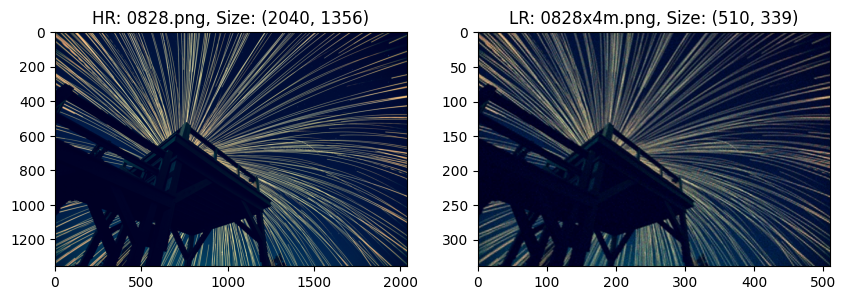

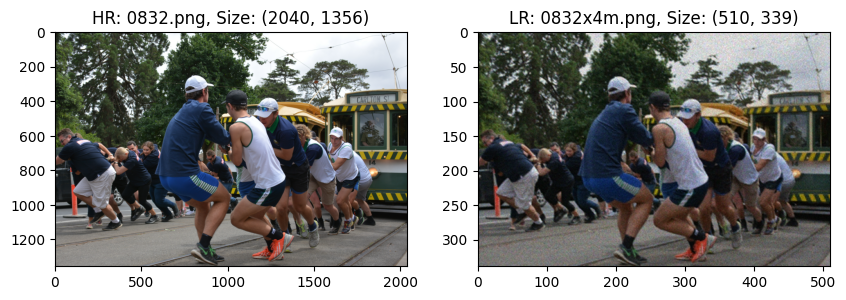

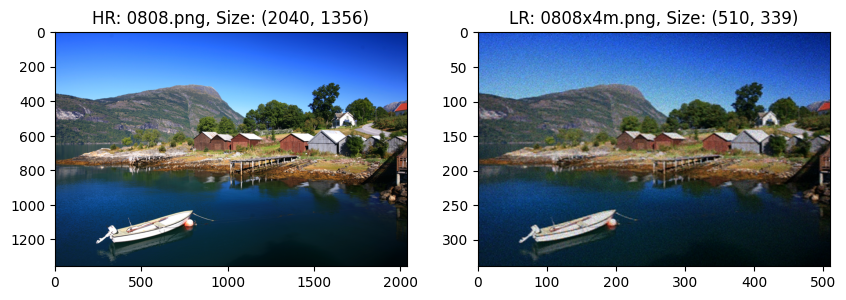

In [5]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

def show_image_samples(hr_folder, lr_folder, num_samples=3):
    hr_images = os.listdir(hr_folder)
    lr_images = os.listdir(lr_folder)

    for _ in range(num_samples):
        img_name = random.choice(hr_images)
        hr_image = Image.open(os.path.join(hr_folder, img_name))

        # Construct the corresponding LR image name
        lr_img_name = img_name.split('.')[0] + 'x4m.' + img_name.split('.')[1]

        if lr_img_name in lr_images:
            lr_image = Image.open(os.path.join(lr_folder, lr_img_name))

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(hr_image)
            plt.title(f'HR: {img_name}, Size: {hr_image.size}')

            plt.subplot(1, 2, 2)
            plt.imshow(lr_image)
            plt.title(f'LR: {lr_img_name}, Size: {lr_image.size}')
            plt.show()
        else:
            print(f"Image {lr_img_name} not found in LR folder")

show_image_samples(hr_folder, lr_folder)

## Image Histograms:
- Generate histograms of pixel intensity distributions for HR and LR images.
Multiple Peaks in LR Image Histogram:
The LR (Low-Resolution) image histogram often shows multiple peaks due to several reasons:

1. Downsampling Artifacts(error): When creating a LR image, downsampling occurs, reducing the number of pixels and potentially introducing artifacts. Pixel values in small areas may be averaged, causing grouping into specific intensity ranges, which appears as peaks in the histogram.

2. Loss of Fine Detail: Since low-resolution images lose fine details, large regions of similar intensities may emerge, especially if smooth gradients in the original image are blurred. This can cause a concentration of pixel values around certain intensity levels.

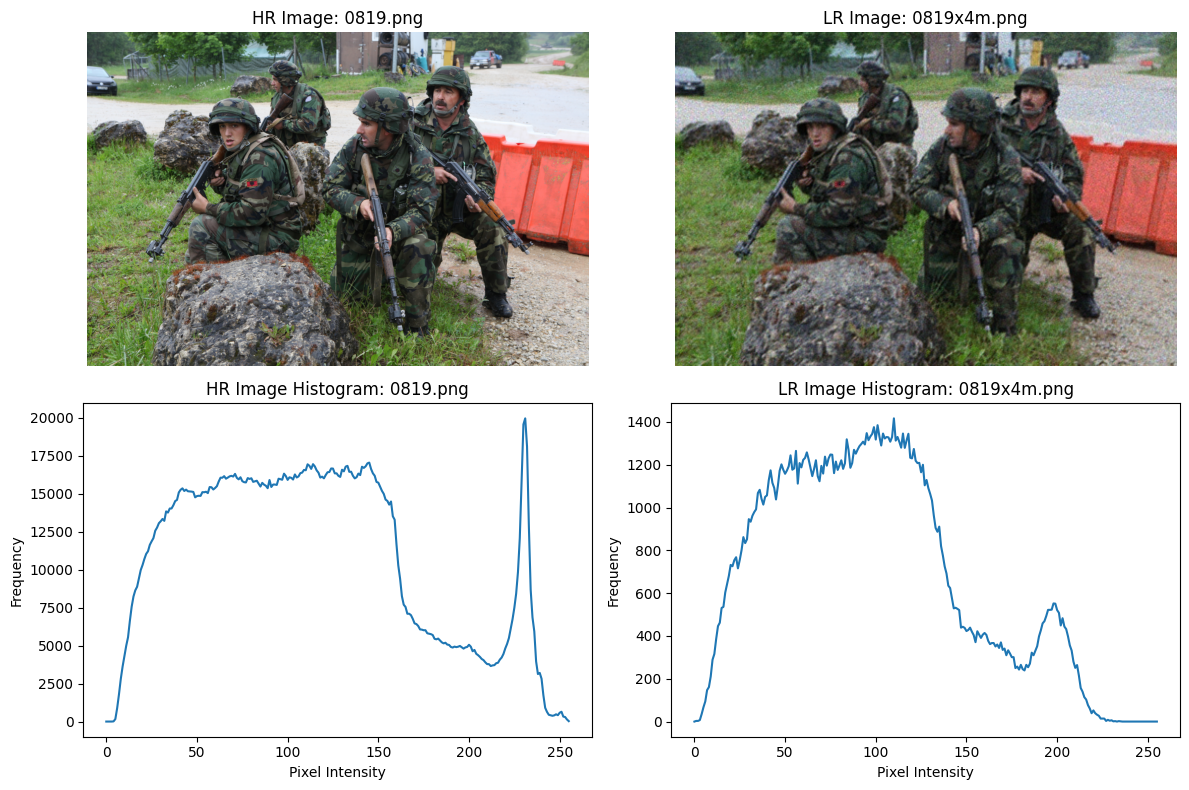

In [6]:
def plot_image_histogram(image, title, ax):
    img_gray = image.convert('L')  # Convert to grayscale
    hist_values = img_gray.histogram()
    ax.plot(hist_values)
    ax.set_title(title)
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Frequency')

# Display HR and LR images and their histograms side by side
hr_images = os.listdir(hr_folder)
lr_images = os.listdir(lr_folder)
random_img_name = random.choice(hr_images)
hr_image = Image.open(os.path.join(hr_folder, random_img_name))

lr_img_name = random_img_name.split('.')[0] + 'x4m.' + random_img_name.split('.')[1]
if lr_img_name in lr_images:
    lr_image = Image.open(os.path.join(lr_folder, lr_img_name))

# Create a 2x2 grid for displaying images and histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot the HR image
axs[0, 0].imshow(hr_image)
axs[0, 0].axis('off')
axs[0, 0].set_title(f'HR Image: {random_img_name}')

# Plot the LR image
axs[0, 1].imshow(lr_image)
axs[0, 1].axis('off')
axs[0, 1].set_title(f'LR Image: {lr_img_name}')

# Plot the HR image histogram
plot_image_histogram(hr_image, f'HR Image Histogram: {random_img_name}', axs[1, 0])

# Plot the LR image histogram
plot_image_histogram(lr_image, f'LR Image Histogram: {lr_img_name}', axs[1, 1])

plt.tight_layout()
plt.show()


## Comparison of Image Quality Metrics:
- Calculate and compare image quality metrics such as the mean squared error (MSE) and structural similarity index (SSIM) between HR and LR images.


#### 1. Mean Squared Error (MSE)
- **Definition**: MSE quantifies the average squared difference between the pixel values of two images. It measures how much the pixel values of the two images differ.

- **Formula**:
  
  $$
  \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (I_1[i] - I_2[i])^2
  $$

  Where:
  - \(I_1\) and \(I_2\) are the pixel values of the two images (HR and LR).
  - \(N\) is the total number of pixels.
  
- **Interpretation**:
  - Lower MSE values indicate better image quality (i.e., the images are more similar).
  - An MSE of 0 means the images are identical.

#### 2. Structural Similarity Index (SSIM)
- **Definition**: SSIM considers changes in structural information, luminance, and contrast to provide a measure of perceived quality.

- **Formula**:
  
  The SSIM index is calculated based on three components:
  
  $$
  \text{SSIM}(x, y) = \frac{(2\mu_x \mu_y + C_1)(2\sigma_{xy} + C_2)}{(\mu_x^2 + \mu_y^2 + C_1)(\sigma_x^2 + \sigma_y^2 + C_2)}
  $$

  Where:
  - \(mu_x) and \(mu_y) are the average pixel intensities of the two images.
  - \(sigma_x^2) and \(sigma_y^2) are the variances of the images.
  - \(sigma_{xy}) is the covariance between the two images.
  - \(C_1) and \(C_2) are constants used to stabilize the division (to avoid instability when the denominator is close to zero).

- **Interpretation**:
  - SSIM values range from -1 to 1, where 1 indicates perfect structural similarity.
  - A value closer to 1 implies the images are similar in a way that aligns with human visual perception.



In [43]:
from skimage.metrics import mean_squared_error, structural_similarity as ssim
import numpy as np

def compare_image_metrics(hr_img, lr_img):
    # Resize hr_img to match lr_img dimensions
    hr_resized = hr_img.resize(lr_img.size)

    # Convert images to grayscale for comparison
    hr_gray = np.array(hr_resized.convert('L'))
    lr_gray = np.array(lr_img.convert('L'))

    # Calculate MSE and SSIM
    mse_value = mean_squared_error(hr_gray, lr_gray)
    ssim_value, _ = ssim(hr_gray, lr_gray, full=True)

    return mse_value, ssim_value

# Load image from HR and LR folders
hr_image_name = '/content/SuperResolution/HR/0824.png'
lr_image_name = '/content/SuperResolution/LR/0824x4m.png'

# Path to HR and LR folders
hr_image_path = os.path.join(hr_folder, hr_image_name)
lr_image_path = os.path.join(lr_folder, lr_image_name)

# Open images
if os.path.exists(hr_image_path) and os.path.exists(lr_image_path):
    hr_image = Image.open(hr_image_path)
    lr_image = Image.open(lr_image_path)

mse, ssim_value = compare_image_metrics(hr_image, lr_image)
print(f'MSE: {mse}, SSIM: {ssim_value}')

MSE: 1811.8455376250795, SSIM: 0.3127801948903906


- MSE of 1811.84 suggests a huge difference between the downsampled HR and LR image. This suggests large information is always lost during downsampling.
- An SSIM of 0.31 suggests a moderate level of structural dissimilarity between the images.

## Pixel Value Comparison:
- Create scatter plots comparing pixel values between HR and LR images.

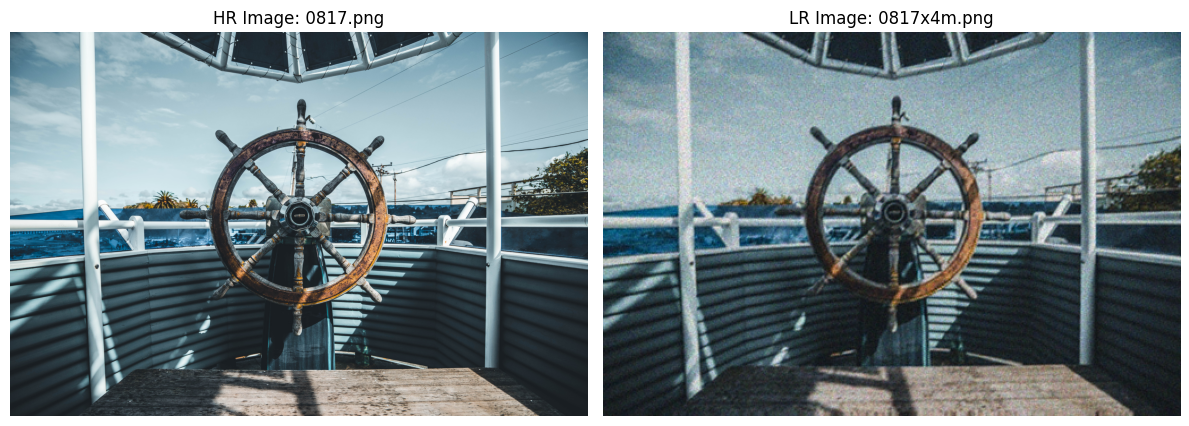

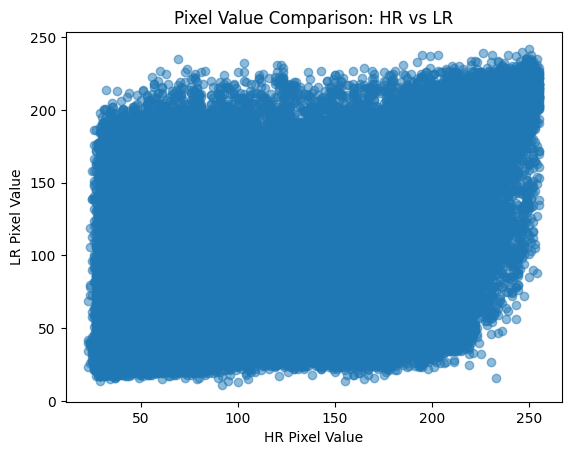

In [29]:
def compare_pixel_values(hr_img, lr_img):
    # Resize hr_img to match lr_img dimensions before converting to arrays
    hr_resized = hr_img.resize(lr_img.size)

    hr_pixels = np.array(hr_resized.convert('L')).flatten()
    lr_pixels = np.array(lr_img.convert('L')).flatten()

    plt.scatter(hr_pixels, lr_pixels, alpha=0.5)
    plt.title('Pixel Value Comparison: HR vs LR')
    plt.xlabel('HR Pixel Value')
    plt.ylabel('LR Pixel Value')
    plt.show()

def plot_images_side_by_side(hr_img, lr_img, hr_img_name, lr_img_name):
    # Create a 1x2 grid for displaying images side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the HR image
    axs[0].imshow(hr_img)
    axs[0].axis('off')
    axs[0].set_title(f'HR Image: {hr_img_name}')

    # Plot the LR image
    axs[1].imshow(lr_img)
    axs[1].axis('off')
    axs[1].set_title(f'LR Image: {lr_img_name}')

    plt.tight_layout()
    plt.show()

# Load image from HR and LR folders
hr_image_name = '/content/SuperResolution/HR/0824.png'
lr_image_name = '/content/SuperResolution/LR/0824x4m.png'

# Path to HR and LR folders
hr_image_path = os.path.join(hr_folder, hr_image_name)
lr_image_path = os.path.join(lr_folder, lr_image_name)

# Open images
if os.path.exists(hr_image_path) and os.path.exists(lr_image_path):
    hr_image = Image.open(hr_image_path)
    lr_image = Image.open(lr_image_path)

# Plot images side by side
plot_images_side_by_side(hr_image, lr_image, random_img_name, lr_img_name)

# Plot pixel value comparison
compare_pixel_values(hr_image, lr_image)


## Pixel-Wise Difference Image:
This highlights regions where the downscaling process caused significant changes in pixel values.

Process:
- Resize the High-resolution image(HR) to the size of the low-resolution image(LR).
- Compute the absolute difference between corresponding pixels.
- Visualize the difference as an image.


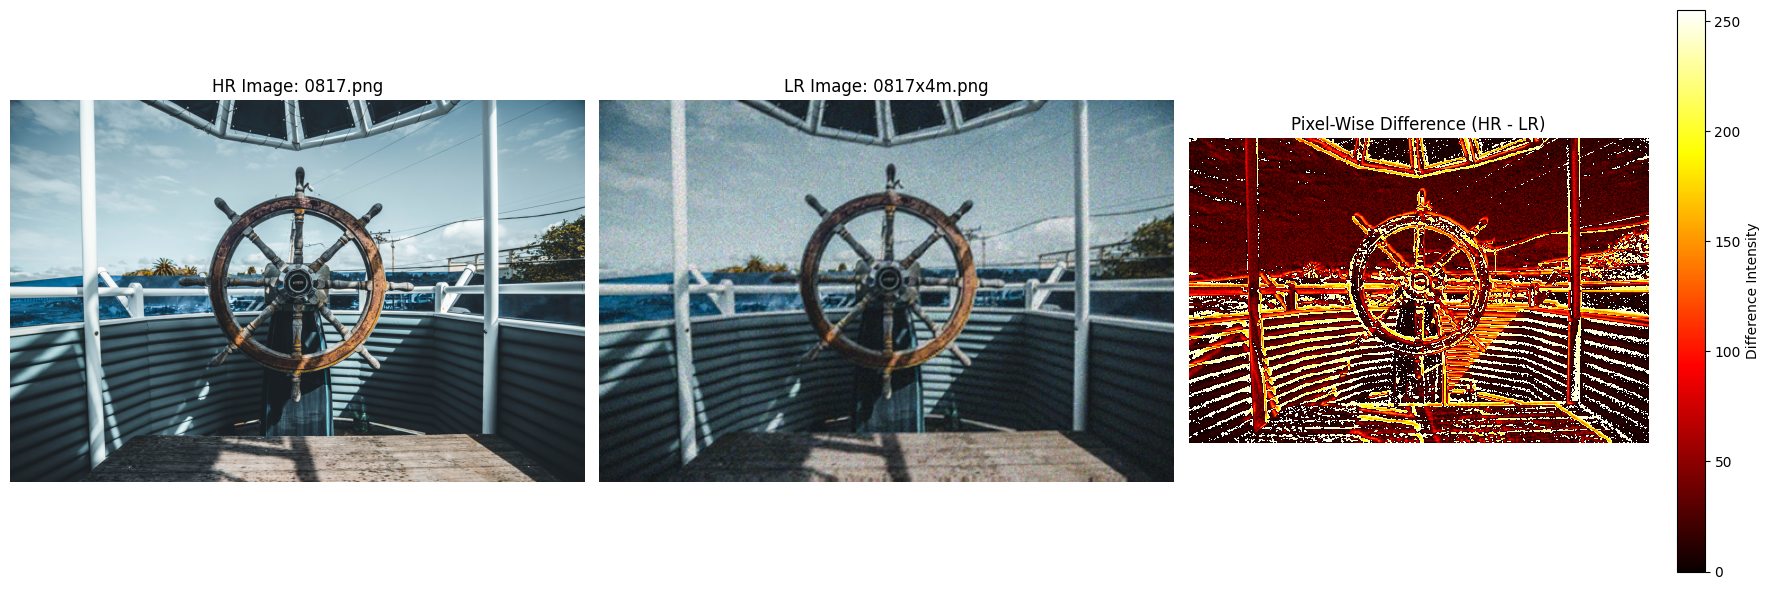

In [28]:
def show_pixel_difference(hr_image, lr_image):
    # Resize the low-resolution image to the size of the high-resolution image
    hr_resized = hr_image.resize(lr_image.size, Image.BICUBIC)

    # Convert images to grayscale for simplicity
    hr_gray = np.array(hr_resized.convert('L'))
    lr_gray = np.array(lr_image.convert('L'))

    # Compute the pixel-wise absolute difference
    diff = np.abs(hr_gray - lr_gray)

    return diff

def plot_images_and_difference(hr_image, lr_image, diff, hr_img_name, lr_img_name):
    # Create a 1x3 grid for displaying the HR, LR, and difference images
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot HR image
    axs[0].imshow(hr_image)
    axs[0].axis('off')
    axs[0].set_title(f'HR Image: {hr_img_name}')

    # Plot LR image
    axs[1].imshow(lr_image)
    axs[1].axis('off')
    axs[1].set_title(f'LR Image: {lr_img_name}')

    # Plot the pixel-wise difference
    im = axs[2].imshow(diff, cmap='hot', interpolation='none')
    axs[2].axis('off')
    axs[2].set_title('Pixel-Wise Difference (HR - LR)')
    fig.colorbar(im, ax=axs[2], label='Difference Intensity')

    plt.tight_layout()
    plt.show()

# Load image from HR and LR folders
hr_image_name = '/content/SuperResolution/HR/0824.png'
lr_image_name = '/content/SuperResolution/LR/0824x4m.png'

# Path to HR and LR folders
hr_image_path = os.path.join(hr_folder, hr_image_name)
lr_image_path = os.path.join(lr_folder, lr_image_name)

# Open images
if os.path.exists(hr_image_path) and os.path.exists(lr_image_path):
    hr_image = Image.open(hr_image_path)
    lr_image = Image.open(lr_image_path)

    # Compute the pixel-wise difference
    diff = show_pixel_difference(hr_image, lr_image)

    # Plot the HR, LR, and difference images side by side
    plot_images_and_difference(hr_image, lr_image, diff, random_img_name, lr_img_name)

## Structural Similarity Index (SSIM) Map:
The Structural Similarity Index (SSIM) is a popular metric that quantifies the perceived quality of an image. Instead of providing a single score, the SSIM can also return a similarity map, which shows how similar corresponding parts of the HR and LR images are.

Process:
- Compute the SSIM score for each pixel neighborhood.
- Generate a map showing similarity on a scale from -1 (completely different) to 1 (identical).

- In the SSIM map, regions close to 1 (bright areas) indicate high similarity, while regions closer to -1 (dark areas) indicate low similarity or a loss of detail in those areas when downscaled.

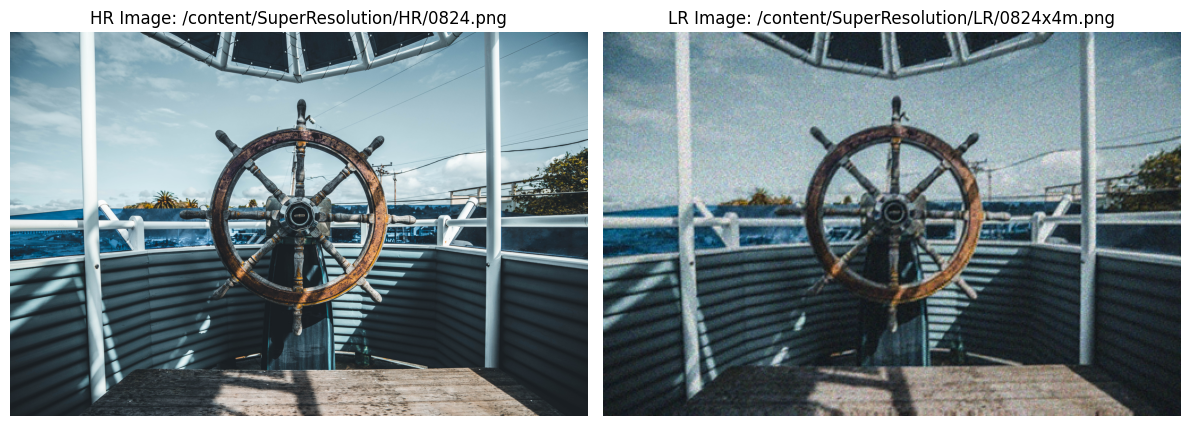

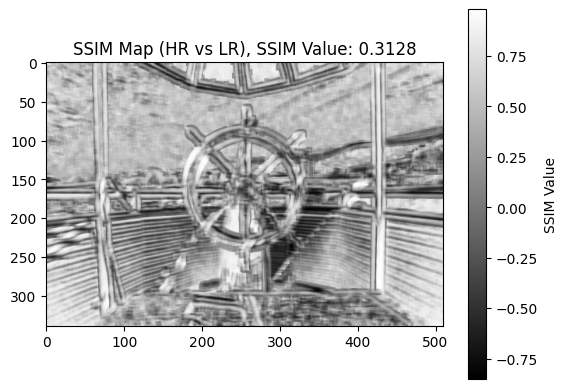

In [27]:
from skimage.metrics import structural_similarity as ssim

def show_ssim_map(hr_image, lr_image):
    # Resize LR image to match HR size
    hr_resized = hr_image.resize(lr_image.size, Image.BICUBIC)

    # Convert images to grayscale
    hr_gray = np.array(hr_resized.convert('L'))
    lr_gray = np.array(lr_image.convert('L'))

    # Compute SSIM and the SSIM map
    ssim_value, ssim_map = ssim(hr_gray, lr_gray, full=True)

    # Display the SSIM map
    plt.imshow(ssim_map, cmap='gray')
    plt.title(f'SSIM Map (HR vs LR), SSIM Value: {ssim_value:.4f}')
    plt.colorbar(label='SSIM Value')
    plt.show()

def plot_images_side_by_side(hr_image, lr_image, hr_img_name, lr_img_name):
    # Create a 1x2 grid for displaying images side by side
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot HR image
    axs[0].imshow(hr_image)
    axs[0].axis('off')
    axs[0].set_title(f'HR Image: {hr_img_name}')

    # Plot LR image
    axs[1].imshow(lr_image)
    axs[1].axis('off')
    axs[1].set_title(f'LR Image: {lr_img_name}')

    plt.tight_layout()
    plt.show()

# Load image from HR and LR folders
hr_image_name = '/content/SuperResolution/HR/0824.png'
lr_image_name = '/content/SuperResolution/LR/0824x4m.png'

# Path to HR and LR folders
hr_image_path = os.path.join(hr_folder, hr_image_name)
lr_image_path = os.path.join(lr_folder, lr_image_name)

# Open images
if os.path.exists(hr_image_path) and os.path.exists(lr_image_path):
    hr_image = Image.open(hr_image_path)
    lr_image = Image.open(lr_image_path)

    # Plot HR and LR images side by side
    plot_images_side_by_side(hr_image, lr_image, hr_image_name, lr_image_name)

    # Show SSIM map
    show_ssim_map(hr_image, lr_image)
else:
    print(f"Image '{hr_image_name}' or '{lr_image_name}' not found.")


## Edge Detection (Canny or Sobel):
Edges represent significant changes in intensity, and their loss in the LR image can suggest loss of critical details.

Process:
- Apply an edge detection algorithm (e.g., Canny or Sobel) to both HR and LR images.
- Compare the resulting edge maps to see which edges are lost in the LR image.
- If the LR edge map shows fewer or blurrier edges compared to the HR edge map, those areas have lost significant detail during downscaling.

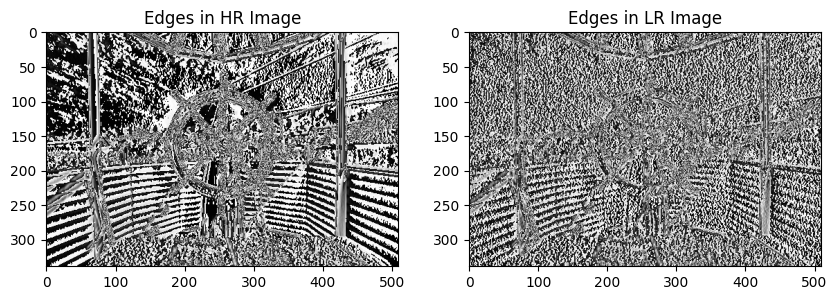

In [30]:
from scipy.ndimage import sobel

def show_edge_loss(hr_image, lr_image):
    # Resize LR image to match HR size
    hr_resized = hr_image.resize(lr_image.size, Image.BICUBIC)

    # Convert images to grayscale
    hr_gray = np.array(hr_resized.convert('L'))
    lr_gray = np.array(lr_image.convert('L'))

    # Apply Sobel edge detection
    hr_edges = sobel(hr_gray)
    lr_edges = sobel(lr_gray)

    # Display HR and LR edge maps
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(hr_edges, cmap='gray')
    plt.title('Edges in HR Image')

    plt.subplot(1, 2, 2)
    plt.imshow(lr_edges, cmap='gray')
    plt.title('Edges in LR Image')

    plt.show()

# Show edge loss
show_edge_loss(hr_image, lr_image)


## Frequency Analysis (Fourier Transform):
Frequency domain analysis (using Fourier Transform) can show how much high-frequency information (fine details) is preserved or lost. High frequencies typically correspond to edges and small details, which are often lost in LR images.

Process:
- Apply the Fourier Transform to both HR and LR images.
- Visualize the magnitude of the frequencies.
- Compare how much high-frequency content is present in the HR image vs. the LR image.

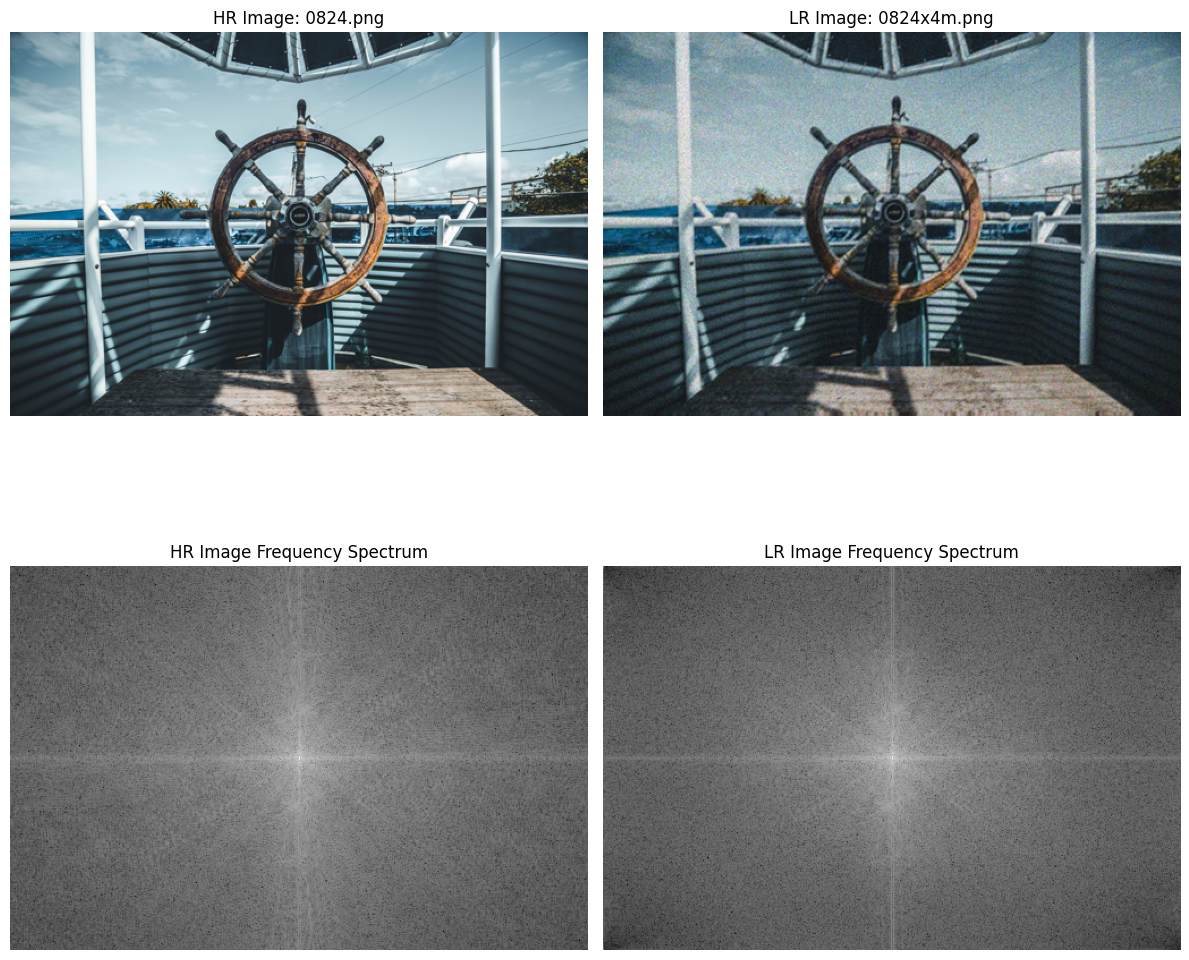

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_frequency_spectrum(image, zoom=True):
    # Convert image to grayscale
    img_gray = np.array(image.convert('L'))

    # Compute 2D Fourier Transform and shift the zero frequency component to the center
    f_transform = np.fft.fftshift(np.fft.fft2(img_gray))
    magnitude_spectrum = 20 * np.log(np.abs(f_transform))

    # Adding axis labels for zoom if needed
    if zoom:
        # Zoom into the high-frequency components (edges)
        center = magnitude_spectrum.shape[0] // 2
        zoom_size = center // 2  # Zoom into the central part of the spectrum
        return magnitude_spectrum[center - zoom_size:center + zoom_size, center - zoom_size:center + zoom_size]

    # Return the magnitude spectrum for plotting
    return magnitude_spectrum

def plot_images_and_spectrums(hr_image, lr_image, hr_img_name, lr_img_name):
    # Resize LR image to match HR size for comparison
    hr_resized = hr_image.resize(lr_image.size, Image.BICUBIC)

    # Create a 2x2 grid for displaying images and their frequency spectrums
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # Plot HR image
    axs[0, 0].imshow(hr_resized)
    axs[0, 0].axis('off')
    axs[0, 0].set_title(f'HR Image: {hr_img_name}')

    # Plot LR image
    axs[0, 1].imshow(lr_image)
    axs[0, 1].axis('off')
    axs[0, 1].set_title(f'LR Image: {lr_img_name}')

    # Plot HR frequency spectrum
    hr_spectrum = plot_frequency_spectrum(hr_resized, zoom=False)
    axs[1, 0].imshow(hr_spectrum, cmap='gray')
    axs[1, 0].set_title('HR Image Frequency Spectrum')
    axs[1, 0].axis('off')

    # Plot LR frequency spectrum
    lr_spectrum = plot_frequency_spectrum(lr_image, zoom=False)
    axs[1, 1].imshow(lr_spectrum, cmap='gray')
    axs[1, 1].set_title('LR Image Frequency Spectrum')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Load specific image (0824)
hr_folder = '/content/SuperResolution/HR'  # Adjust this path
lr_folder = '/content/SuperResolution/LR'  # Adjust this path
hr_image_name = '0824.png'  # HR image name
lr_image_name = '0824x4m.png'  # LR image name

# Path to HR and LR images
hr_image_path = os.path.join(hr_folder, hr_image_name)
lr_image_path = os.path.join(lr_folder, lr_image_name)

# Open images
if os.path.exists(hr_image_path) and os.path.exists(lr_image_path):
    hr_image = Image.open(hr_image_path)
    lr_image = Image.open(lr_image_path)

    # Plot images and their frequency spectrums
    plot_images_and_spectrums(hr_image, lr_image, hr_image_name, lr_image_name)
else:
    print(f"Image '{hr_image_name}' or '{lr_image_name}' not found.")
